# GOES imagery

The ability to load and visualize GOES-16 was added in pycontrails 0.47.2. This notebook demonstrates basic usage.

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

from pycontrails.datalib import goes

## Download GOES data

By default, any GOES data will be cached on disk. Set `cachestore=None` to disable caching when defining the `GOES` object.

We download data for bands 1, 2, and 3. These are needed for creating a true color image.

In [2]:
handler = goes.GOES(region="conus", bands=("C01", "C02", "C03"))

# Download the data
da = handler.get("2023-02-05T18:00:00")
da

<xarray.DataArray 'CMI' (band_id: 3, y: 3000, x: 5000)> Size: 180MB
dask.array<getitem, shape=(3, 3000, 5000), dtype=float32, chunksize=(1, 250, 250), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float32 12kB 0.1282 0.1282 0.1282 ... 0.04431 0.04428 0.04425
  * x        (x) float32 20kB -0.1013 -0.1013 -0.1013 ... 0.03857 0.0386 0.03863
  * band_id  (band_id) int64 24B 1 2 3
    t        datetime64[ns] 8B 2023-02-05T18:02:35.739931008
Attributes:
    long_name:                  ABI L2+ Cloud and Moisture Imagery reflectanc...
    standard_name:              toa_lambertian_equivalent_albedo_multiplied_b...
    sensor_band_bit_depth:      10
    valid_range:                [   0 4095]
    units:                      1
    resolution:                 y: 0.000028 rad x: 0.000028 rad
    grid_mapping:               goes_imager_projection
    cell_methods:               t: point area: point
    ancillary_variables:        DQF
    goes_imager_projection:     {'long_name': 'GOES-R ABI fixed grid projecti...
    geospatial_lat_lon_extent:  {'long_name': 'geospatial latitude and longit...

## True color

First we plot a true color image of the CONUS region.

In [3]:
# Extract artifacts for plotting
rgb, src_crs, src_extent = goes.extract_goes_visualization(da, color_scheme="true")

### RGB array

The rgb array is a 3D array with shape `(3, y, x)`. The first dimension contains the red, green, and blue channels, respectively. The second and third dimensions contain the y and x coordinates. The plot below shows the earth as seen by the satellite.

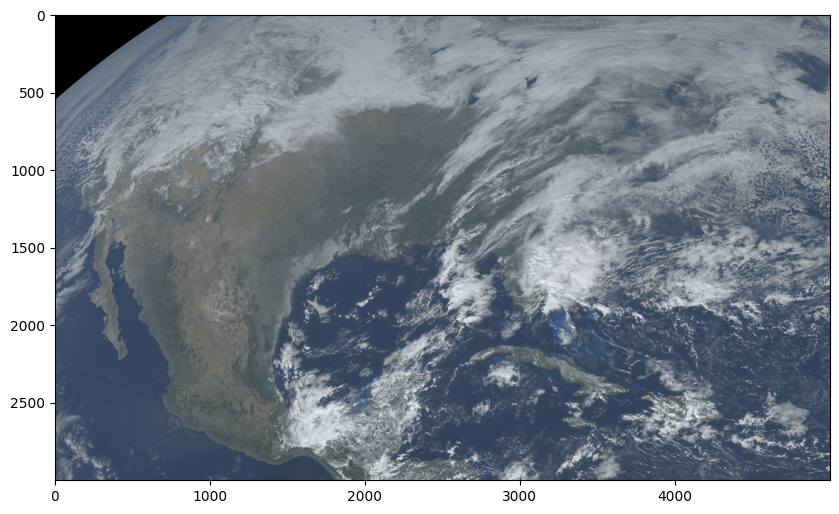

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(rgb, origin="upper");

### Projection artifacts

The `src_crs` is a `cartopy.crs.Projection` describing the coordinate reference system of the satellite data. The `src_extent` is a tuple containing the extent of the data in the source coordinate reference system. These can be used to plot the data on a map.

In [5]:
src_crs

<Projected CRS: +proj=geos +ellps=WGS84 +a=6378137.0 +b=6356752.31 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Geostationary Satellite (Sweep X)
Datum: Unknown based on GRS 1980 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Visualize

We project the image to a Lambert Conformal projection and add state boundaries and coastlines to the plot.

In [6]:
dst_crs = ccrs.LambertConformal(
    central_longitude=-95,
    central_latitude=40,
    standard_parallels=(33, 45),
)

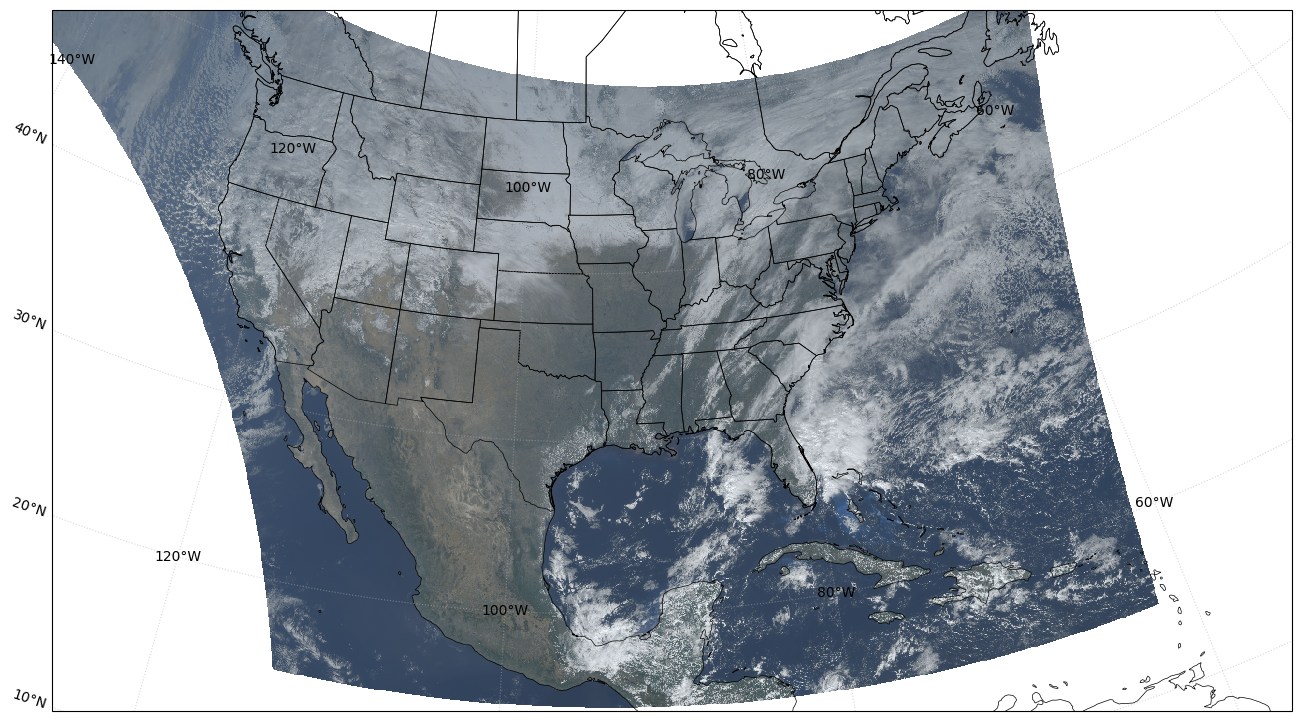

In [7]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(projection=dst_crs, extent=(-125, -55, 12, 50))

ax.coastlines(resolution="50m", color="black", linewidth=0.5)
ax.add_feature(cfeature.STATES, edgecolor="black", linewidth=0.5)

ax.imshow(rgb, extent=src_extent, transform=src_crs, origin="upper", interpolation="none")

gl = ax.gridlines(draw_labels=True, alpha=0.5, linestyle=":")
gl.top_labels = False
gl.right_labels = False

## Ash color scheme

The ash color scheme was originally developed to visualize volcanic ash. It is also useful for visualizing contrails.

We download data for bands 11, 14, and 15 to create an ash color image.

In [8]:
handler = goes.GOES(region="conus", bands=("C11", "C14", "C15"))
da = handler.get("2023-02-09T18:00:00")

rgb, src_crs, src_extent = goes.extract_visualization(da, color_scheme="ash")

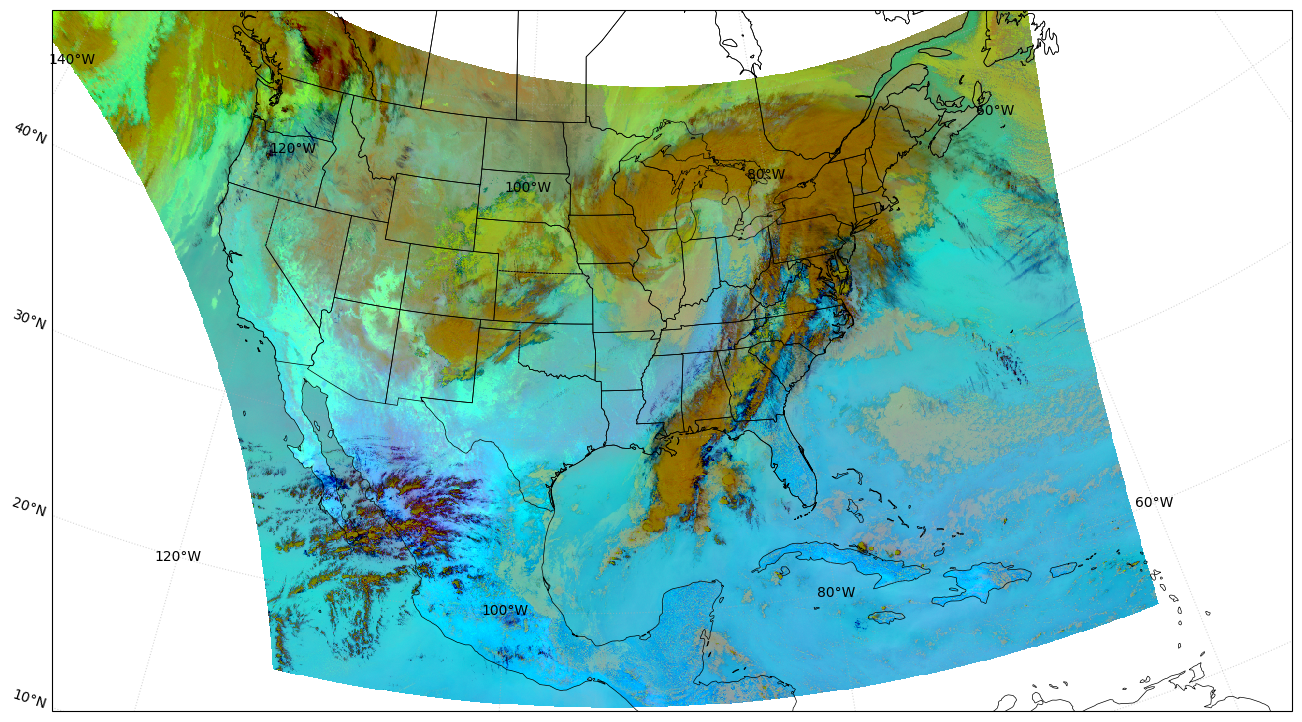

In [9]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(projection=dst_crs, extent=(-125, -55, 12, 50))

ax.coastlines(resolution="50m", color="black", linewidth=0.5)
ax.add_feature(cfeature.STATES, edgecolor="black", linewidth=0.5)

ax.imshow(rgb, extent=src_extent, transform=src_crs, origin="upper", interpolation="none")

gl = ax.gridlines(draw_labels=True, alpha=0.5, linestyle=":")
gl.top_labels = False
gl.right_labels = False